Simulating: 100%|██████████| 1000000/1000000 [00:08<00:00, 121458.53it/s]


Average number of honor tiles: 2.88
Average number of terminal tiles: 5.35
Average number of pairs: 1.87


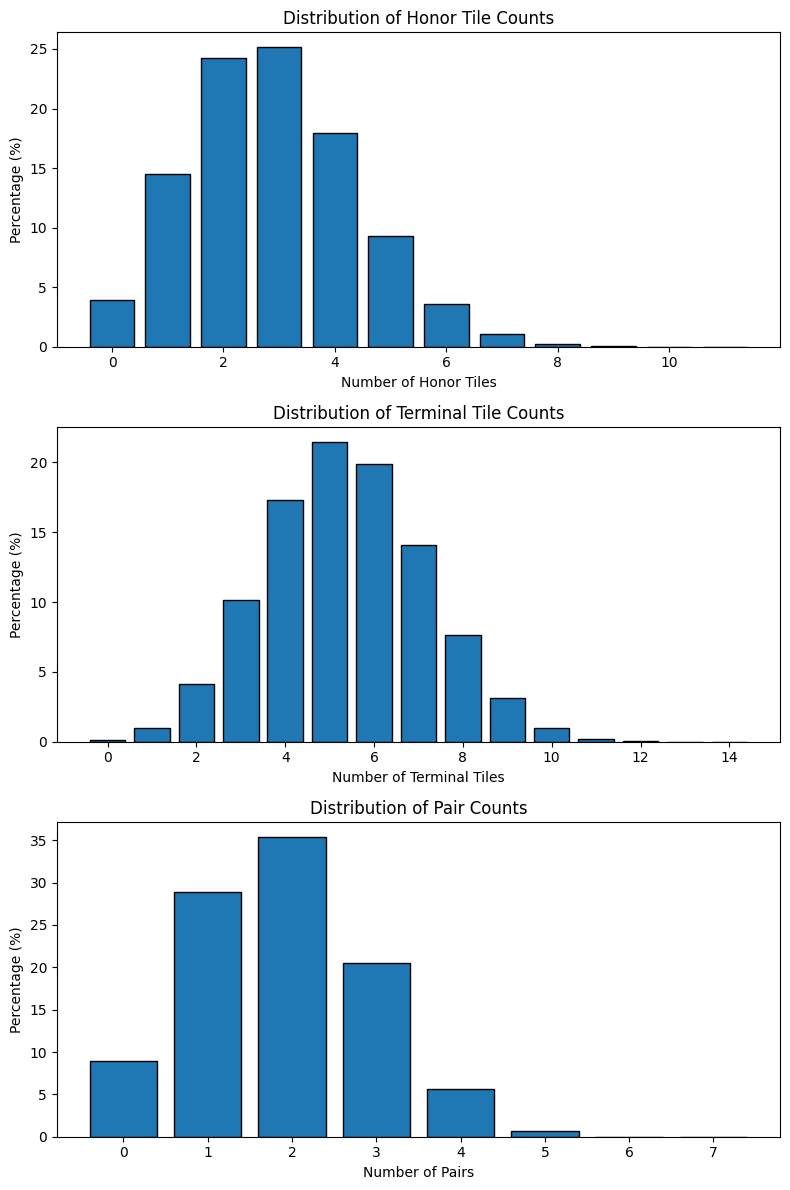

In [1]:
import random
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

# Define tile pool: numbered suits (m, p, s) and honor tiles (z)
number_tiles = [f"{num}{suit}" for suit in ['m', 'p', 's'] for num in range(1, 10)]
honor_tiles = [f"{num}z" for num in range(1, 8)]
all_tiles = number_tiles + honor_tiles

def generate_hand():
    """Randomly generate a 14-tile hand (with replacement)."""
    return [random.choice(all_tiles) for _ in range(14)]

def count_honors(hand):
    """Count the number of honor tiles in the hand."""
    return sum(1 for t in hand if t.endswith('z'))

def count_terminals(hand):
    """
    Count the number of terminal tiles in the hand:
    honor tiles or numbered tiles of rank 1 or 9.
    """
    total = 0
    for t in hand:
        if t.endswith('z'):
            total += 1
        else:
            rank = int(t[:-1])
            if rank in (1, 9):
                total += 1
    return total

def count_pairs(hand):
    """
    Count the number of pairs in the hand:
    exactly two of the same tile counts as one pair;
    three or four of a kind do not count as pairs here.
    """
    freq = Counter(hand)
    return sum(1 for c in freq.values() if c == 2)

# Number of simulations
simulations = 1_000_000

# Distributions and running totals
dist_honors = Counter()
dist_terminals = Counter()
dist_pairs = Counter()
sum_honors = 0
sum_terminals = 0
sum_pairs = 0

for _ in tqdm(range(simulations), desc="Simulating"):
    hand = generate_hand()
    h = count_honors(hand)
    t = count_terminals(hand)
    p = count_pairs(hand)
    dist_honors[h] += 1
    dist_terminals[t] += 1
    dist_pairs[p] += 1
    sum_honors += h
    sum_terminals += t
    sum_pairs += p

# Compute averages
avg_honors = sum_honors / simulations
avg_terminals = sum_terminals / simulations
avg_pairs = sum_pairs / simulations

print(f"Average number of honor tiles: {avg_honors:.2f}")
print(f"Average number of terminal tiles: {avg_terminals:.2f}")
print(f"Average number of pairs: {avg_pairs:.2f}")

# Plot distributions as percentages
fig, axes = plt.subplots(3, 1, figsize=(8, 12), tight_layout=True)

# Honor tile percentage distribution
x_h, y_h = zip(*sorted(dist_honors.items()))
y_h_pct = [count / simulations * 100 for count in y_h]
axes[0].bar(x_h, y_h_pct, edgecolor='black')
axes[0].set_xlabel("Number of Honor Tiles")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Distribution of Honor Tile Counts")

# Terminal tile percentage distribution
x_t, y_t = zip(*sorted(dist_terminals.items()))
y_t_pct = [count / simulations * 100 for count in y_t]
axes[1].bar(x_t, y_t_pct, edgecolor='black')
axes[1].set_xlabel("Number of Terminal Tiles")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_title("Distribution of Terminal Tile Counts")

# Pair count percentage distribution
x_p, y_p = zip(*sorted(dist_pairs.items()))
y_p_pct = [count / simulations * 100 for count in y_p]
axes[2].bar(x_p, y_p_pct, edgecolor='black')
axes[2].set_xlabel("Number of Pairs")
axes[2].set_ylabel("Percentage (%)")
axes[2].set_title("Distribution of Pair Counts")

plt.show()

